In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dd = pd.read_csv('airbnb bali-cleansed dataset.csv')
dd

,service_level,max_guest,no_bedroom,no_bed,no_bathroom,rating,no_review,price,type,area,amenities
0,REGULAR,2.0,1.0,1.0,1.0,5.00,13,42.0,Entire villa,Ubud,"Pool,Wifi,Air conditioning,Kitchen"
1,REGULAR,2.0,1.0,1.0,1.0,5.00,9,38.0,Entire villa,Ubud,"Pool,Wifi,Air conditioning,Kitchen"
2,SUPERHOST,2.0,1.0,1.0,1.0,4.93,28,47.0,Private room,Ubud,"Pool,Wifi,Air conditioning,Kitchen"
3,REGULAR,6.0,2.0,2.0,2.0,4.90,52,215.0,Entire villa,Ubud,"Pool,Wifi,Air conditioning,Kitchen"
4,PLUS,4.0,2.0,3.0,2.0,4.77,439,280.0,Treehouse,Ubud,"Pool,Wifi,Air conditioning,Kitchen"
...,...,...,...,...,...,...,...,...,...,...,...
295,REGULAR,5.0,2.0,2.0,2.0,4.57,7,171.0,Entire villa,Ubud,"Pool,Wifi,Air conditioning,none"
296,REGULAR,2.0,1.0,1.0,1.0,4.84,133,50.0,Entire villa,Ubud,"Pool,Wifi,Air conditioning,none"
297,REGULAR,2.0,1.0,1.0,1.0,4.86,7,19.0,Entire rental unit,Ubud,"Wifi,Kitchen,none,none"
298,REGULAR,2.0,1.0,1.0,1.0,4.77,13,100.0,Entire villa,Ubud,"Pool,Wifi,Air conditioning,Kitchen"


# 3. Feature Engineering

## 3.1. Binning

Binning is the process of grouping data values into certain classes. It is usually done to continuous numerical values by grouping those values into certain number of dicrete classes. Nevertheless, it can also be done to categorical variables by regrouping the existing categories into smaller number of classes. The objective of binning is to prevent overfitting and minimize error in our analysis. In this case, we want to bin some of our categorical features into smaller number of classes.

In [3]:
dd.groupby(by = 'service_level').count() 

#This label has 3 classes, which is a fairly good number. Leave this label as is

,max_guest,no_bedroom,no_bed,no_bathroom,rating,no_review,price,type,area,amenities
service_level,,,,,,,,,,
PLUS,20,20,20,20,20,20,20,20,20,20
REGULAR,123,123,123,123,123,123,123,123,123,123
SUPERHOST,157,157,157,157,157,157,157,157,157,157


In [4]:
dd['type'].nunique() #checking the number of classes

20

In [5]:
dd.groupby(by = 'type').count() 

# The number of classes is unnecessarily large (20) but nearly 50% of the frequencies is concentrated in one category (Entire villa)
# Therefore, we want to regroup those classes into 2 classes, 'Entire villa' and 'Room'



,service_level,max_guest,no_bedroom,no_bed,no_bathroom,rating,no_review,price,area,amenities
type,,,,,,,,,,
Dome house,3,3,3,3,3,3,3,3,3,3
Entire bungalow,3,3,3,3,3,3,3,3,3,3
Entire cabin,1,1,1,1,1,1,1,1,1,1
Entire cottage,2,2,2,2,2,2,2,2,2,2
Entire guesthouse,1,1,1,1,1,1,1,1,1,1
Entire loft,2,2,2,2,2,2,2,2,2,2
Entire place,1,1,1,1,1,1,1,1,1,1
Entire rental unit,11,11,11,11,11,11,11,11,11,11
Entire residential home,14,14,14,14,14,14,14,14,14,14


In [6]:
# regroup into smaller number of classes
# group into {Entire unit, Room}

for i in range(len(dd)):
    if dd.iloc[i, 8] == 'Private room' or dd.iloc[i, 8] == 'Shared room' or dd.iloc[i, 8] == 'Room in boutique hotel' or dd.iloc[i, 8] == 'Hotel room' or dd.iloc[i, 8] == 'Resort room':
        dd.iloc[i, 8] = 'Room'
    else:
        dd.iloc[i, 8] = 'Entire Unit'       

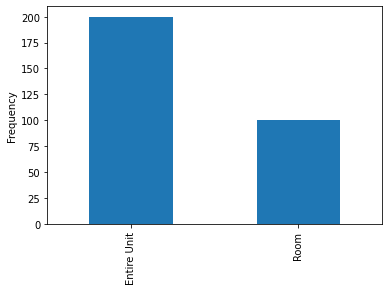

In [7]:
dd['type'].value_counts().plot(kind = 'bar')

plt.ylabel('Frequency')
plt.show()

In [8]:
dd.groupby(by = 'type').count()

# I am amazed that we got pretty numbers here!

,service_level,max_guest,no_bedroom,no_bed,no_bathroom,rating,no_review,price,area,amenities
type,,,,,,,,,,
Entire Unit,200,200,200,200,200,200,200,200,200,200
Room,100,100,100,100,100,100,100,100,100,100


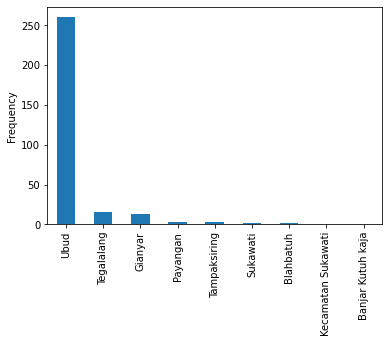

In [9]:
dd['area'].value_counts().plot(kind = 'bar')

plt.ylabel('Frequency')
plt.show()

In [10]:
dd.groupby(by = 'area').mean()['price']

area
Banjar Kutuh kaja     102.000000
Blahbatuh              41.500000
Gianyar               204.076923
Kecamatan Sukawati     48.000000
Payangan              120.666667
Sukawati               24.000000
Tampaksiring          168.666667
Tegalalang            112.466667
Ubud                  102.400000
Name: price, dtype: float64

The label 'area' still has too many classes, even after grouping similar names together, and can not be binned into smaller number of classes. Its values is also concentrated on one class ('Ubud). Therefore, we  will just drop it and won't bother conducting hypothesis testing

In [11]:
dd = dd.drop(labels = 'area', axis = 1)

In [12]:
# At this point, we want to deal with amenities. 
# It seems that wifi and air conditioning in hotels are so common that we can expect every place has them
# Therefore, we want to isolate only the pool and kitchen amenities

dd['pool'] = np.where(dd['amenities'].str.contains('Pool'), 'Pool', 'No Pool')
dd['kitchen'] = np.where(dd['amenities'].str.contains('Kitchen'), 'Kitchen', 'No Kitchen')

dd.head()

,service_level,max_guest,no_bedroom,no_bed,no_bathroom,rating,no_review,price,type,amenities,pool,kitchen
0,REGULAR,2.0,1.0,1.0,1.0,5.00,13,42.0,Entire Unit,"Pool,Wifi,Air conditioning,Kitchen",Pool,Kitchen
1,REGULAR,2.0,1.0,1.0,1.0,5.00,9,38.0,Entire Unit,"Pool,Wifi,Air conditioning,Kitchen",Pool,Kitchen
2,SUPERHOST,2.0,1.0,1.0,1.0,4.93,28,47.0,Room,"Pool,Wifi,Air conditioning,Kitchen",Pool,Kitchen
3,REGULAR,6.0,2.0,2.0,2.0,4.90,52,215.0,Entire Unit,"Pool,Wifi,Air conditioning,Kitchen",Pool,Kitchen
4,PLUS,4.0,2.0,3.0,2.0,4.77,439,280.0,Entire Unit,"Pool,Wifi,Air conditioning,Kitchen",Pool,Kitchen


## 3.2. Feature Selection

#### At this stage, we would like to drop unused labels and rearrange the remaining ones

In [13]:
# To make our dataset more pleasing to our eyes
# I decided to rearrange our labels, 
# categorical labels are placed on the left, numerical labels on the right, and price (our target) on the rightmost

dr = dd[['service_level', 'type', 'pool','kitchen', 'max_guest', 'no_bedroom','no_bed','no_bathroom', 'rating', 'no_review', 'price']]

dr.head()

,service_level,type,pool,kitchen,max_guest,no_bedroom,no_bed,no_bathroom,rating,no_review,price
0,REGULAR,Entire Unit,Pool,Kitchen,2.0,1.0,1.0,1.0,5.00,13,42.0
1,REGULAR,Entire Unit,Pool,Kitchen,2.0,1.0,1.0,1.0,5.00,9,38.0
2,SUPERHOST,Room,Pool,Kitchen,2.0,1.0,1.0,1.0,4.93,28,47.0
3,REGULAR,Entire Unit,Pool,Kitchen,6.0,2.0,2.0,2.0,4.90,52,215.0
4,PLUS,Entire Unit,Pool,Kitchen,4.0,2.0,3.0,2.0,4.77,439,280.0


In [14]:
dr.describe()

,max_guest,no_bedroom,no_bed,no_bathroom,rating,no_review,price
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000
mean,2.983333,1.396667,1.523333,1.48500,4.830667,63.076667,107.043333
std,2.063310,0.876670,1.143305,0.93641,0.158592,93.405851,125.731205
min,2.000000,1.000000,1.000000,1.00000,3.710000,0.000000,11.000000
25%,2.000000,1.000000,1.000000,1.00000,4.777500,3.000000,36.000000
50%,2.000000,1.000000,1.000000,1.00000,4.860000,22.500000,63.500000
75%,4.000000,2.000000,2.000000,2.00000,4.910000,86.000000,126.000000
max,16.000000,7.000000,9.000000,7.00000,5.000000,582.000000,768.000000


sns.pairplot(dr)

# checking the distribution of our features

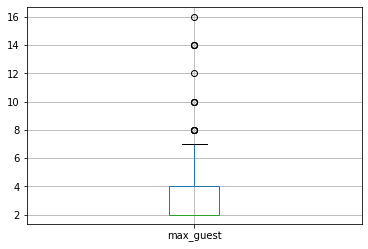

In [15]:
dr.boxplot(column = 'max_guest') 

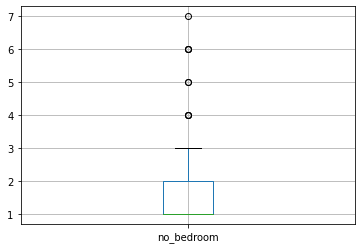

In [16]:
dr.boxplot(column = 'no_bedroom') 

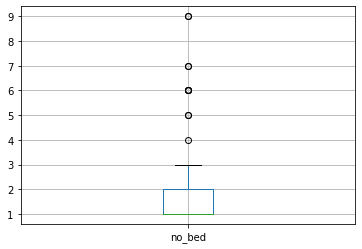

In [17]:
dr.boxplot(column = 'no_bed')

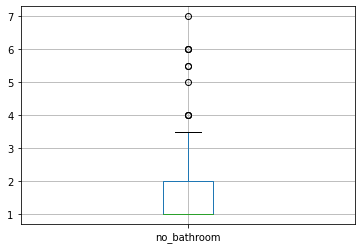

In [18]:
dr.boxplot(column = 'no_bathroom')

#### From above whisker plots, we can tell that those labels have some outliers but not extreme. We can leave them that way.

### 3.2.1 Correlation Test

- One of the assumption in Multiple Linear Regression is that independent variables have linear relationship with target variable. Therefore, we run correlation test to see which features are strongly correlated with ur target. Those that are weakly correlated can be eliminated

- Another assumption is little or no multicolinearity among features. Therefore, from the remaining features, we check whether those features are correlated and then we pick one from those that are correlated.

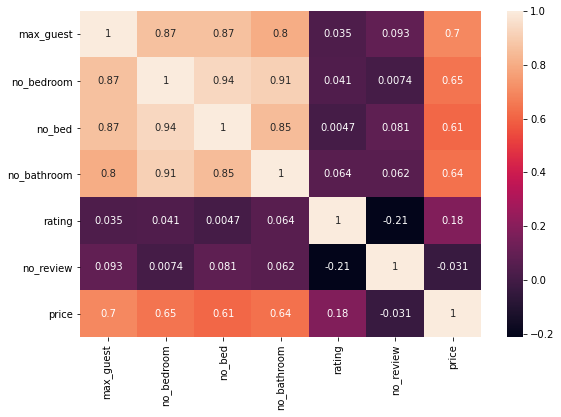

In [19]:
plt.figure(figsize=(9, 6))

sns.heatmap(dr.corr(),annot = True)

- As we can see from figure above, 'price' (our target) is strongly correlated with 'max_guest','no_bedroom','no_bed', and 'no_bathroom'. Therefore, we can eliminate 'rating', and 'no_review'

- Those remaining features are also correlated with each other. Therefore, I decided to choose the one with highest score ('max_guest)

- We are left with ony one numerical feature

### 3.2.2. Hypothesis testing

- While we use correlation test as a basis to pick our numerical features, we use hypothesis testing for categorical features.
- We want to check whether there is association between each of the categorical features and target.


1. Establish our null hypothesis (the price in each class of feature is equal)
2. Determine the number of classes in each of our feature
3. Check the distribution of our target

If the p-value is smaller than our chosen alpha --> we include that feature in our model

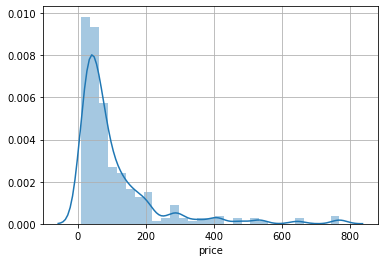

In [20]:
sns.distplot(dr['price'])

plt.grid()
plt.show()

# As we can see, our target variable is not normally distributed (skewed on the right)

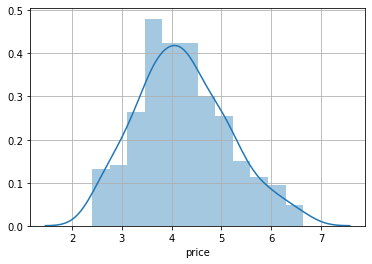

In [21]:
# Since hypothesis testing that we are going to use requires the assumption of normality
# We need to transform 'price'
# Use log transformation on 'price'

sns.distplot(np.log(dr['price'])) 

plt.grid()
plt.show()

# the distribution looks quite normal

In [22]:
dx = dd[['type', 'pool', 'kitchen', 'service_level', 'price']]
dx.head()

,type,pool,kitchen,service_level,price
0,Entire Unit,Pool,Kitchen,REGULAR,42.0
1,Entire Unit,Pool,Kitchen,REGULAR,38.0
2,Room,Pool,Kitchen,SUPERHOST,47.0
3,Entire Unit,Pool,Kitchen,REGULAR,215.0
4,Entire Unit,Pool,Kitchen,PLUS,280.0


In [23]:
dx['log_price'] = np.log(dx['price']) 
dx.head()

# Because the distribution of price is skewed, we want to use the log transformation of price instead

,type,pool,kitchen,service_level,price,log_price
0,Entire Unit,Pool,Kitchen,REGULAR,42.0,3.737670
1,Entire Unit,Pool,Kitchen,REGULAR,38.0,3.637586
2,Room,Pool,Kitchen,SUPERHOST,47.0,3.850148
3,Entire Unit,Pool,Kitchen,REGULAR,215.0,5.370638
4,Entire Unit,Pool,Kitchen,PLUS,280.0,5.634790


In [24]:
# Because type, pool, and kitchen have 2 classes, we use Student's T-test
# alpha = 0.05

price_type = dx.pivot(index =dx.index, columns = 'type')['log_price']
price_entire = price_type['Entire Unit'].dropna()
price_room = price_type['Room'].dropna()

price_pool = dx.pivot(index =dx.index, columns = 'pool')['log_price']
price_poolyes = price_pool['Pool'].dropna()
price_poolno = price_pool['No Pool'].dropna()

price_kitchen = dx.pivot(index =dx.index, columns = 'kitchen')['log_price']
price_kitchenyes = price_kitchen['Kitchen'].dropna()
price_kitchenno = price_kitchen['No Kitchen'].dropna()

In [25]:
stats.ttest_ind(price_entire,price_room) 

# statistically significant --> we can use 'type' feature

Ttest_indResult(statistic=8.048122138319082, pvalue=2.0179532628135574e-14)

In [26]:
stats.ttest_ind(price_poolyes,price_poolno) 

# statistically significant

Ttest_indResult(statistic=5.911365670757256, pvalue=9.273798255923312e-09)

In [27]:
stats.ttest_ind(price_kitchenyes,price_kitchenno) 

#statistically significant

Ttest_indResult(statistic=4.832535944030147, pvalue=2.1613039820880027e-06)

In [28]:
# Because 'service_level' has 3 classes, we use One-Way ANOVA
# alpha = 0.05

price_service = dx.pivot(index =dx.index, columns = 'service_level')['log_price']

In [29]:
price_regular = price_service['REGULAR'].dropna()
price_superhost = price_service['SUPERHOST'].dropna()
price_plus = price_service['PLUS'].dropna()     

In [30]:
stats.f_oneway(price_regular, price_superhost, price_plus)

#statistically significant

F_onewayResult(statistic=4.662584891625192, pvalue=0.010143884922481038)

In [31]:
features = dr.drop(labels = ['no_bedroom', 'no_bed', 'no_bed', 'no_bathroom', 'rating', 'no_review'], axis = 1)

features

,service_level,type,pool,kitchen,max_guest,price
0,REGULAR,Entire Unit,Pool,Kitchen,2.0,42.0
1,REGULAR,Entire Unit,Pool,Kitchen,2.0,38.0
2,SUPERHOST,Room,Pool,Kitchen,2.0,47.0
3,REGULAR,Entire Unit,Pool,Kitchen,6.0,215.0
4,PLUS,Entire Unit,Pool,Kitchen,4.0,280.0
...,...,...,...,...,...,...
295,REGULAR,Entire Unit,Pool,No Kitchen,5.0,171.0
296,REGULAR,Entire Unit,Pool,No Kitchen,2.0,50.0
297,REGULAR,Entire Unit,No Pool,Kitchen,2.0,19.0
298,REGULAR,Entire Unit,Pool,Kitchen,2.0,100.0


In [32]:
features.to_csv('features_ubud.csv')

## 3.3. Creating dummies

In [33]:
features = pd.get_dummies(data = features)
features = features.drop(labels = ['service_level_REGULAR','type_Room', 'pool_No Pool', 'kitchen_No Kitchen'], axis = 1)

# I intentionally drop the dummy variables manually so I can choose the reference categories

features

,max_guest,price,service_level_PLUS,service_level_SUPERHOST,type_Entire Unit,pool_Pool,kitchen_Kitchen
0,2.0,42.0,0,0,1,1,1
1,2.0,38.0,0,0,1,1,1
2,2.0,47.0,0,1,0,1,1
3,6.0,215.0,0,0,1,1,1
4,4.0,280.0,1,0,1,1,1
...,...,...,...,...,...,...,...
295,5.0,171.0,0,0,1,1,0
296,2.0,50.0,0,0,1,1,0
297,2.0,19.0,0,0,1,0,1
298,2.0,100.0,0,0,1,1,1
